 BÀI 1 VÀ BÀI 2 LINEAR REGRESSION + NON-LINEAR REGRESSION

In [1]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Thư viện cho hình vẽ
plt.rcParams.update({'figure.figsize': (7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình giống nhau


In [2]:
#Link data Leson 1a,b
link =  'https://drive.google.com/file/d/1JmOgZGM-4MYumG1ALz5W56Edur69MAeN/view?usp=sharing'

In [3]:
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path) #Dữ liệu về lợi nhuận và chi phí của 44 công ty gồm 5 cột: Số thứ tự (No.)/Lợi nhuận(Profit)/Chi phí nghiên cứu(RnD)/Chi phí quản lý(Adm)/Chi phí tiếp thị (Marketing).

In [7]:
#Xem thông tin cơ bản về dữ liệu
#df.head()
#df.info()
df.describe()

,No.,Profit,RnD,Adm,Marketing
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,121.045455,83.227273,122.090909,231.409091
std,12.845233,33.271927,40.267630,27.446200,109.308464
min,1.000000,70.000000,16.000000,51.000000,0.000000
25%,11.750000,97.000000,59.500000,102.500000,146.250000
50%,22.500000,110.500000,76.500000,123.000000,239.500000
75%,33.250000,144.500000,116.250000,145.250000,303.500000
max,44.000000,192.000000,165.000000,183.000000,472.000000


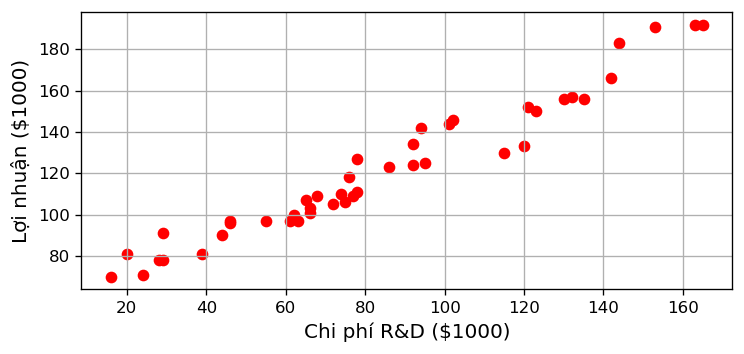

In [8]:
#Vẽ hình thể hiện hai biến x, y
plt.xlabel('Chi phí R&D ($1000)', fontsize=12)
plt.ylabel('Lợi nhuận ($1000)', fontsize=12)
plt.grid()
plt.scatter(df.RnD, df.Profit, color='red', marker='o')

In [9]:
#Xây dựng mô hình
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #import thư viện
#1.Gọi mô hình từ thư viện Gán mô hình bằng một biến. (model)
model_lin = linear_model.LinearRegression()
#2. Training model (model.fit(x, y))
X = df[['RnD']]
y = df.Profit

In [10]:
model_lin.fit(X,y)

LinearRegression()

In [12]:
#In ra thông tin của mô hình y=ax+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model_lin.coef_)
print('b=', model_lin.intercept_)

a= [0.80515698]
b= 54.034435258116105


In [13]:
print('Phương trình hồi quy tuyến tính cần tìm là: y = 0.8x + 54')

Phương trình hồi quy tuyến tính cần tìm là: y = 0.8x + 54


In [16]:
#3.Dự báo 
#model_lin.predict([[1000]]) #Dự báo với giá trị x bất kỳ thì giá trị y là bao nhiêu. Ở đây ví dụ cứ chi 1000$ cho nghiên cứu thì sẽ thu về lợi nhuận là bao nhiêu?. (Dấu [[]] để python hiểu đúng kiểu dữ liệu)
y_pred=model_lin.predict(df[['RnD']]) # Dự báo lại với chuỗi y (y_pred: y prediction)

In [17]:
#ví dụ
c=model_lin.predict([[1000]])
print(c)

[859.19141195]


/Users/minhtao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
y_pred

array([186.88533641, 185.27502246, 177.22345269, 169.9770399 ,
       168.36672595, 160.31515618, 162.73062711, 158.70484223,
       151.45842944, 153.06874339, 136.16044688, 135.3552899 ,
       129.71919107, 128.10887711, 150.65327246, 146.62748758,
       116.83667944, 130.52434804, 128.10887711, 123.27793525,
       115.22636549, 116.83667944, 113.61605153, 108.78510967,
       116.03152246, 106.36963874, 114.42120851, 112.00573758,
       107.17479572, 107.17479572, 103.95416781, 103.14901084,
       104.75932479,  98.31806898,  91.07165619,  91.07165619,
        77.38398758,  89.46134223,  70.13757479,  85.43555735,
        77.38398758,  76.57883061,  73.3582027 ,  66.91694689])

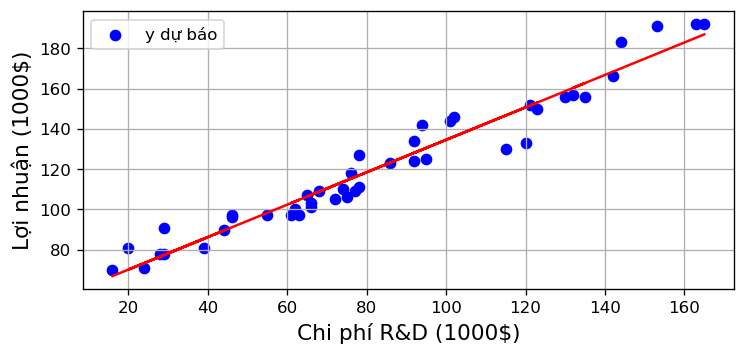

In [20]:
#Vẽ đường dự đoán cùng hình thể hiện 2 biến x, y
plt.xlabel('Chi phí R&D (1000$)',fontsize=13)
plt.ylabel('Lợi nhuận (1000$)',fontsize=13)
plt.scatter(df.RnD, df.Profit, color='blue', marker='o')
plt.plot(df.RnD,y_pred, color='red')
plt.legend(['y dự báo'])
plt.grid()

In [22]:
#4. Tính toán độ chính xác
from sklearn.metrics import r2_score
Ac = r2_score(df.Profit, y_pred)
print('The accuracy of this model is: R-square=',"{:.2f}".format(Ac))

The accuracy of this model is: R-square= 0.95


Bài tập 1: Thực hành xây dựng mô hình tính lợi nhuận (y) dựa trên chi phí Quản lý (x) (Adm)

In [26]:
#Xây dựng mô hình
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #import thư viện
#1.Gọi mô hình từ thư viện Gán mô hình bằng 1 biến (model)
model_lin=linear_model.LinearRegression()
#2.Training model (model.fit(x, y))/ Phần này chúng ta chưa quan tâm tới chia training set, test set
X=df[['Adm']]
y=df.Profit

In [27]:
model_lin.fit(X,y)
#model_lin.fit(X,y)

LinearRegression()

In [28]:
#In ra thông tin của mô hình y=ax+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model_lin.coef_)
print('b=',model_lin.intercept_)


a= [0.22962156]
b= 93.01074912715967


In [29]:
print('Phương trình hồi quy tuyến tính cần tìm là: y = 0.22x + 93')

Phương trình hồi quy tuyến tính cần tìm là: y = 0.22x + 93


In [31]:
#3.Dự báo 
#model_lin.predict([[100]]) #Dự báo với giá trị x bất kỳ thì giá trị y là bao nhiêu. Ở đây ví dụ cứ chi 1000$ cho nghiên cứu thì sẽ thu về lợi nhuận là bao nhiêu?. (Dấu [[]] để python hiểu đúng kiểu dữ liệu)
y_pred=model_lin.predict(df[['Adm']]) # Dự báo lại với chuỗi y (y_pred: y prediction)

In [32]:
y_pred

array([124.46890331, 127.6836052 , 116.20252703, 120.33571517,
       113.90631139, 115.97290546, 126.76511894, 126.53549738,
       127.22436207, 118.03949953, 118.49874266, 114.13593296,
       122.17268767, 124.00966018, 129.06133458, 121.25420142,
       121.02457986, 126.30587582, 119.18760735, 128.37246989,
       119.18760735, 128.37246989, 121.25420142, 117.35063484,
       115.7432839 , 125.157768  , 126.07625425, 122.40230924,
       135.03149522, 128.14284832, 119.64685048, 128.14284832,
       122.6319308 , 116.66177015, 129.29095614, 112.52858201,
       122.17268767, 104.72144886, 108.16577231, 112.06933889,
       120.33571517, 112.52858201, 115.05441921, 122.17268767])

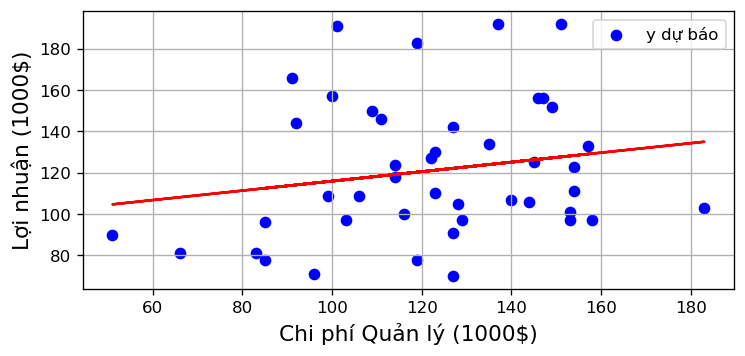

In [36]:
#Vẽ đường dự đoán cùng hình thể hiện 2 biến x, y
plt.xlabel('Chi phí Quản lý (1000$)',fontsize=13)
plt.ylabel('Lợi nhuận (1000$)',fontsize=13)
plt.scatter(df.Adm, df.Profit, color='blue', marker='o')
plt.plot(df.Adm,y_pred, color='red')
plt.legend(['y dự báo'])
plt.grid()

In [35]:
#4. Tính toán độ chính xác
from sklearn.metrics import r2_score
Ac = r2_score(df.Profit, y_pred)
print('The accuracy of this model is: R-square=',"{:.2f}".format(Ac))

The accuracy of this model is: R-square= 0.04


Bài tập 2: Thực hành xây dựng mô hình tính lợi nhuận (y) dựa trên chi phí Marketing (x) (Marketing)

In [37]:
#Xây dựng mô hình
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #import thư viện
#1.Gọi mô hình từ thư viện Gán mô hình bằng một biến. (model)
model_lin = linear_model.LinearRegression()
#2. Training model (model.fit(x, y))
X = df[['Marketing']]
y = df.Profit

In [38]:
model_lin.fit(X,y)
#model_lin.fit(X,y)

LinearRegression()

In [39]:
#In ra thông tin của mô hình y=ax+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model_lin.coef_)
print('b=',model_lin.intercept_)

a= [0.21918035]
b= 70.32512879175947


In [40]:
print('Phương trình hồi quy tuyến tính cần tìm là: y = 0.21x + 70')

Phương trình hồi quy tuyến tính cần tìm là: y = 0.21x + 70


In [41]:
#3.Dự báo 
#model_lin.predict([[100]]) #Dự báo với giá trị x bất kỳ thì giá trị y là bao nhiêu. Ở đây ví dụ cứ chi 1000$ cho nghiên cứu thì sẽ thu về lợi nhuận là bao nhiêu?. (Dấu [[]] để python hiểu đúng kiểu dữ liệu)
y_pred=model_lin.predict(df[['Marketing']]) # Dự báo lại với chuỗi y (y_pred: y prediction)

In [42]:
y_pred

array([173.77825443, 167.6412046 , 159.75071197, 154.2712032 ,
       150.54513723, 149.88759618,  98.38021371, 141.33956249,
       138.70939828, 137.17513583, 120.51742915, 125.12021652,
       125.12021652, 125.77775758, 126.65447898, 127.75038074,
       128.18874144, 132.3531681 , 134.98333232,  70.32512879,
       135.86005372, 136.07923407, 136.73677512, 137.17513583,
       101.22955827, 100.57201722,  99.69529582, 147.69579267,
        96.1884102 ,  93.77742634,  90.27054073,  89.61299967,
        80.40742493, 117.44890424, 116.57218284, 115.47628108,
       114.38037933, 113.50365792, 110.87349371, 108.6816902 ,
       108.2433295 , 106.27070634, 102.76382073,  78.21562143])

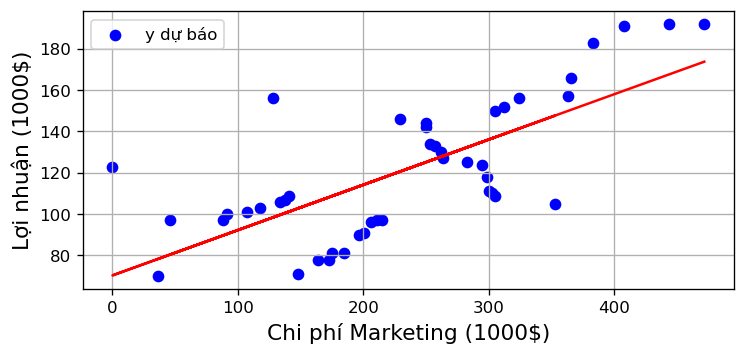

In [43]:
#Vẽ đường dự đoán cùng hình thể hiện 2 biến x, y
plt.xlabel('Chi phí Marketing (1000$)',fontsize=13)
plt.ylabel('Lợi nhuận (1000$)',fontsize=13)
plt.scatter(df.Marketing, df.Profit, color='blue', marker='o')
plt.plot(df.Marketing,y_pred, color='red')
plt.legend(['y dự báo'])
plt.grid()

In [44]:
#4. Tính toán độ chính xác
from sklearn.metrics import r2_score
Ac = r2_score(df.Profit, y_pred)
print('The accuracy of this model is: R-square=',"{:.2f}".format(Ac))

The accuracy of this model is: R-square= 0.52


Bài 1b) Xây dựng mô hình hồi quy tuyến tính với nhiều biến (Linear Regression multiple variables)

In [45]:
df.head()

,No.,Profit,RnD,Adm,Marketing
0,1,192,165,137,472
1,2,192,163,151,444
2,3,191,153,101,408
3,4,183,144,119,383
4,5,166,142,91,366


In [46]:
#1.Gọi mô hình từ thư viện Gán mô hình bằng 1 biến (model2)
model2=linear_model.LinearRegression()

In [47]:
X=df[['RnD','Adm','Marketing']]
y=df.Profit

In [48]:
model2.fit(X,y)

LinearRegression()

In [49]:
#In ra thông tin của mô hình y=a1x1+a2x2+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model2.coef_)
print('b=',model2.intercept_)

a= [ 0.76568728 -0.04792094  0.02582812]
b= 57.19323971874567


In [50]:
#3.Dự báo 
#model2.predict([[1000, 500]]) #Dự báo với giá trị x1, x2 bất kỳ thì giá trị y là bao nhiêu. Ở đây là chi 1000$ cho nghiên cứu và 500$ cho Marketing thì thu về lợi nhuận là ?. (Dấu [[]] để python hiểu đúng kiểu dữ liệu)
y_pred2=model2.predict(X) # Dự báo lại với chuỗi y (y_pred: y prediction)

In [51]:
#4. Tính toán độ chính xác
from sklearn.metrics import r2_score
Ac2=r2_score(df.Profit, y_pred2)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))

The accuracy of this model is:R-square= 0.96


Bài tập: Thực hành xây dựng mô hình tính lợi nhuận (y) dựa trên 2 loại chi phí (R&D và Quản lý)

In [52]:
#1.Gọi mô hình từ thư viện Gán mô hình bằng 1 biến (model2)
model3=linear_model.LinearRegression()

In [53]:
X=df[['RnD','Adm']]
y=df.Profit

In [54]:
model3.fit(X,y)

LinearRegression()

In [56]:
#In ra thông tin của mô hình y=a1x1+a2x2+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model3.coef_)
print('b=',model3.intercept_)

a= [ 0.81847778 -0.07663111]
b= 62.28174257077128


In [57]:
#3.Dự báo 
#model3.predict([[1000, 500]]) #Dự báo với giá trị x1, x2 bất kỳ thì giá trị y là bao nhiêu. Ở đây là chi 1000$ cho nghiên cứu và 500$ cho Marketing thì thu về lợi nhuận là ?. (Dấu [[]] để python hiểu đúng kiểu dữ liệu)
y_pred3=model3.predict(X) # Dự báo lại với chuỗi y (y_pred: y prediction)

In [58]:
y_pred3

array([186.8321146 , 184.12232357, 179.76910106, 171.02344115,
       171.53215654, 162.65769881, 161.51147019, 157.4957124 ,
       149.89951907, 154.60171885, 137.26042329, 137.89793651,
       129.48650337, 127.23649897, 148.46799245, 146.98106114,
       116.77401444, 128.92562125, 128.84575218, 120.86964129,
       115.75010773, 114.32181906, 113.42347222, 109.81533434,
       117.71805209, 104.75444342, 112.63269678, 111.40336113,
       102.27778366, 104.57671683, 104.13815661, 100.48432793,
       103.96043002,  99.40501653,  87.82400572,  93.41807642,
        76.28544776,  94.38657845,  73.59364518,  87.84199418,
        76.8984966 ,  78.68547641,  74.56862313,  65.64523663])

In [59]:
#4. Tính toán độ chính xác
from sklearn.metrics import r2_score
Ac3=r2_score(df.Profit, y_pred3)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac3))

The accuracy of this model is:R-square= 0.95


Bài 1c) Xây dựng mô hình hồi quy không tuyến tính với 1 biến (Polynominal Regression)

In [ ]:
#Phương trình có dạng y= an*x^n+b

Xây dựng mô hình Polynomial cho dữ liệu thực tế

In [60]:
#Link data Lesson 1c
link='https://drive.google.com/file/d/152LotqU5CNPUbkTokYvY9tOt1bGk9mHG/view?usp=sharing'
#Nguồn data https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv

In [61]:
#Đọc data 
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)  #Dữ liệu về lương theo cấp bậc của 1 công ty gồm 3 cột Vị trí trong công ty/Cấp bậc/Lương

In [62]:
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [63]:
X = df.iloc[:, 1:2].values #Biến X là giá trị của cột 2 
y = df.iloc[:, 2].values #Biến y là giá trị của cột 3

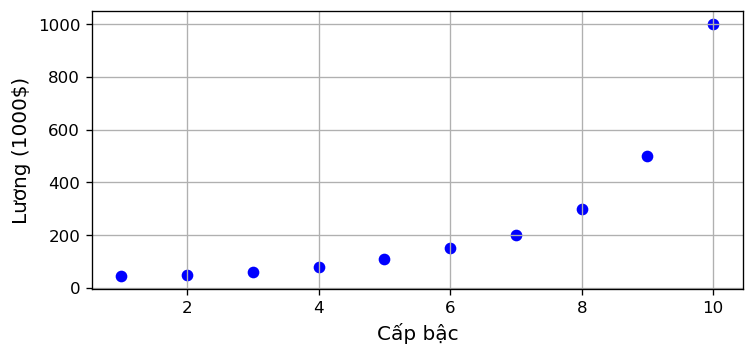

In [64]:
#Vẽ hình thể hiện hai biến x, y
plt.xlabel('Cấp bậc',fontsize=12)
plt.ylabel('Lương (1000$)',fontsize=12)
plt.grid()
plt.scatter(X, y/1000, color='blue', marker='o')

In [65]:
#Xây dựng mô hình Linear
model_lin=linear_model.LinearRegression()
model_lin.fit(X,y)
y_pred_lin=model_lin.predict(X)

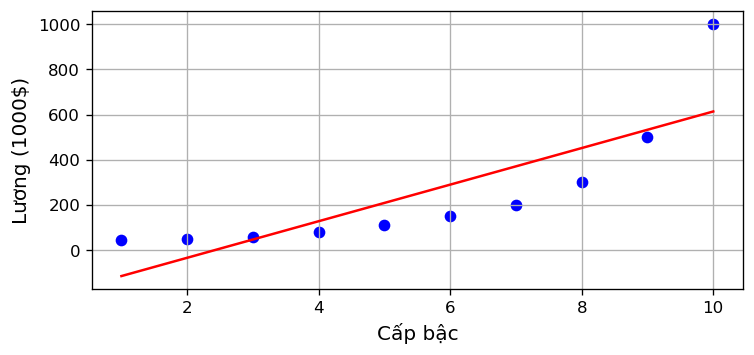

In [66]:
#Vẽ hình thể hiện hai biến x, y
plt.xlabel('Cấp bậc',fontsize=12)
plt.ylabel('Lương (1000$)',fontsize=12)
plt.grid()
plt.scatter(X, y/1000, color='blue', marker='o') #y/1000 đơn vị sẽ là 1000$
plt.plot(X, y_pred_lin/1000, color='red', marker='') #y_pred_lin/1000 đơn vị sẽ là 1000$

In [67]:
#Hình vẽ cho thấy Mô hình Linear không tốt
Ac=r2_score(y, y_pred_lin)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 0.67


In [68]:
# Xây dựng mô hình Polynomial
from sklearn.preprocessing import PolynomialFeatures
Poly_reg = PolynomialFeatures(degree=4) #Tạo Polynomial Features bậc 4 (bậc có thể thay đổi tùy vào dữ liệu)
X_poly = Poly_reg.fit_transform(X) # Tạo giá trị của X theo Polynomial Features
model_Pol = LinearRegression() # Thực chất Mô hình Polynomial được tính dựa trên công cụ LinearRegression với dữ liệu X đã được chuyển đổi bởi Polynomial Features
model_Pol.fit(X_poly, y)

LinearRegression()

In [69]:
y_pred_Pol= model_Pol.predict(X_poly)

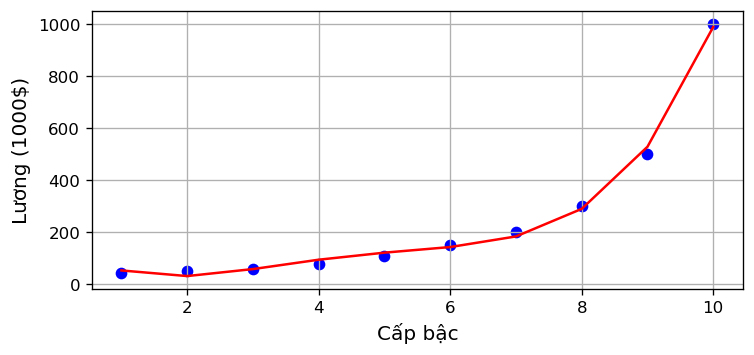

In [70]:
# Hiển thị dữ liệu dự báo và dữ liệu raw
plt.xlabel('Cấp bậc',fontsize=12)
plt.ylabel('Lương (1000$)',fontsize=12)
plt.scatter(X, y/1000, color='blue', marker='o')
plt.plot(X,y_pred_Pol/1000, color='red')
plt.grid()
#Thay đổi bậc của Polynomial để thấy sự thay đổi của đường dự báo

In [71]:
#Độ chính xác tốt hơn rất nhiều so với Linear(0.6)
Ac=r2_score(y, y_pred_Pol)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 1.00


In [72]:
from sklearn.metrics import mean_squared_error
import math

In [73]:
rmse=math.sqrt(mean_squared_error(y, y_pred_Pol))
rmse

14503.234909627112

In [74]:
RMSE=[]
for i in range(2,10,1):
  Poly_reg = PolynomialFeatures(degree=i) #Tạo Polynomial Features bậc 4 (bậc có thể thay đổi tùy vào dữ liệu)
  X_poly = Poly_reg.fit_transform(X) # Tạo giá trị của X theo Polynomial Features
  model_Pol = LinearRegression() # Thực chất Mô hình Polynomial được tính dựa trên công cụ LinearRegression với dữ liệu X đã được chuyển đổi bởi Polynomial Features
  model_Pol.fit(X_poly, y)
  y_pred_Pol= model_Pol.predict(X_poly)
  rmse=math.sqrt(mean_squared_error(y, y_pred_Pol))
  RMSE.append(rmse)

In [75]:
RMSE

[82212.12400451247,
 38931.504012329155,
 14503.234909627112,
 4047.5034752649062,
 2018.7783931048214,
 1361.6432712726457,
 724.2423238628963,
 0.04778740433623346]

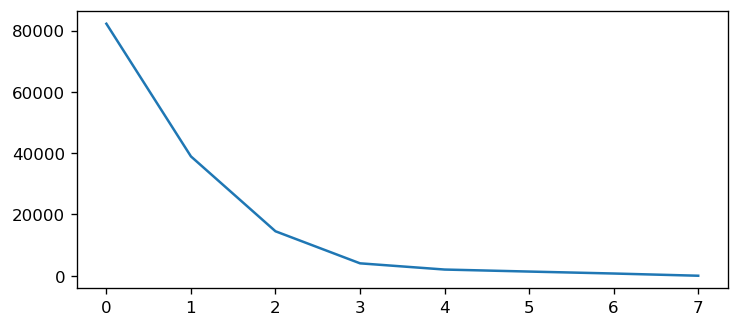

In [76]:
plt.plot(RMSE)